In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

from lazypredict.Supervised import LazyClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

from xverse.ensemble import VotingSelector
#from lightgbm import LGBMClassifier

pd.set_option('display.max_columns', None)
%config InlineBackend.figure_format = 'retina' 
%matplotlib inline
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('stroke_model.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26029 entries, 0 to 26028
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rowID                26029 non-null  int64  
 1   patientAge           26029 non-null  int64  
 2   patientSexName       26029 non-null  float64
 3   smoking              26029 non-null  float64
 4   alcohol              26029 non-null  float64
 5   vital_bmi            26029 non-null  float64
 6   vital_hr             26029 non-null  float64
 7   vital_pulse          26029 non-null  float64
 8   vital_temperature    26029 non-null  float64
 9   vital_rr             26029 non-null  float64
 10  vital_bps            26029 non-null  float64
 11  vital_bpd            26029 non-null  float64
 12  LDL-Cholesterol      26029 non-null  float64
 13  Hypertension         26029 non-null  int64  
 14  Hyperlipidaemia      26029 non-null  int64  
 15  Diabetes_Mellitus    26029 non-null 

In [3]:
# df_cor = df.corr()
# df_cor.style.background_gradient(cmap='Blues').format('{:.2f}')

In [5]:
df.isnull().sum()

rowID                  0
patientAge             0
patientSexName         0
smoking                0
alcohol                0
vital_bmi              0
vital_hr               0
vital_pulse            0
vital_temperature      0
vital_rr               0
vital_bps              0
vital_bpd              0
LDL-Cholesterol        0
Hypertension           0
Hyperlipidaemia        0
Diabetes_Mellitus      0
Hemiplegia             0
Chronic_kidney         0
Atrial_fibrillation    0
Hypokalemia            0
stroke                 0
Age_R                  0
health_level           0
LDL_level              0
Creatinine             0
Cholesterol            0
FBS                    0
Triglyceride           0
Potassium              0
HCT                    0
Age_R_e                0
health_level_e         0
LDL_level_e            0
dtype: int64

In [6]:
# sns.scatterplot(x='patientAge', y='LDL-Cholesterol', hue='stroke', data=df);

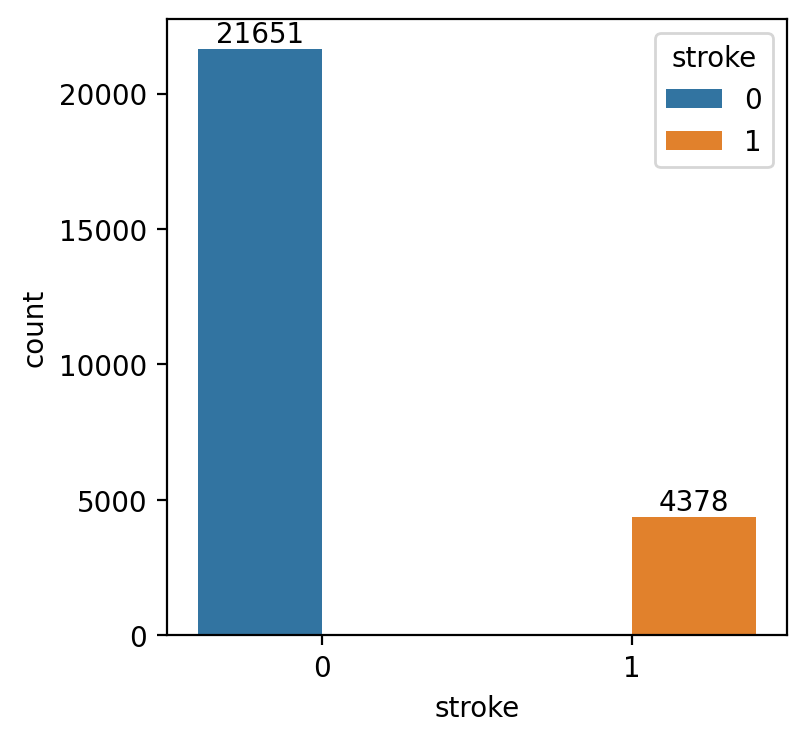

In [7]:
# plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(4,4))
ax = sns.countplot(x='stroke', hue='stroke', data=(df))
for container in ax.containers:
    ax.bar_label(container)

In [8]:
df.columns

Index(['rowID', 'patientAge', 'patientSexName', 'smoking', 'alcohol',
       'vital_bmi', 'vital_hr', 'vital_pulse', 'vital_temperature', 'vital_rr',
       'vital_bps', 'vital_bpd', 'LDL-Cholesterol', 'Hypertension',
       'Hyperlipidaemia', 'Diabetes_Mellitus', 'Hemiplegia', 'Chronic_kidney',
       'Atrial_fibrillation', 'Hypokalemia', 'stroke', 'Age_R', 'health_level',
       'LDL_level', 'Creatinine', 'Cholesterol', 'FBS', 'Triglyceride',
       'Potassium', 'HCT', 'Age_R_e', 'health_level_e', 'LDL_level_e'],
      dtype='object')

In [9]:
X = df.drop(['rowID', 'stroke','Age_R','health_level','LDL_level','Age_R_e','health_level_e','LDL_level_e'], axis=1)
y = df['stroke']

In [4]:
# X

In [11]:
y

0        1
1        1
2        1
3        1
4        1
        ..
26024    0
26025    0
26026    0
26027    0
26028    0
Name: stroke, Length: 26029, dtype: int64

In [12]:
Counter(y)

Counter({1: 4378, 0: 21651})

In [13]:
y.value_counts()

0    21651
1     4378
Name: stroke, dtype: int64

In [14]:
# train 80 & test 20 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=7)

In [15]:
print(len(X_test))
print(len(X_train))

2603
23426


## Decision Tree เฉย ๆ

In [16]:
from sklearn import tree

In [17]:
dt = tree.DecisionTreeClassifier()

In [18]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [19]:
dt.score(X_train,y_train)

1.0

In [20]:
dt.score(X_test,y_test) #score = accuracy

0.825585862466385

In [21]:
# new = [2, 155, 50, 30, 200, 25, 0.24, 34]
# new_pred = dt.predict([new])
# new_pred

In [22]:
y_pred = dt.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [23]:
confusion_matrix(y_test, y_pred)

array([[1951,  238],
       [ 216,  198]], dtype=int64)

In [24]:
# plot_confusion_matrix(dt, X_test, y_test);

In [25]:
# metrics.precision_score(y_test, y_pred)

In [26]:
# metrics.recall_score(y_test, y_pred)

In [27]:
tn,fp,fn,tp = metrics.confusion_matrix(y_test, y_pred).ravel()

In [28]:
recall = tp/(tp+fn)
recall

0.4782608695652174

In [29]:
precision = tp/(tp+fp)
precision

0.4541284403669725

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      2189
           1       0.45      0.48      0.47       414

    accuracy                           0.83      2603
   macro avg       0.68      0.68      0.68      2603
weighted avg       0.83      0.83      0.83      2603



## Random Forest เฉย ๆ

In [31]:
rf = RandomForestClassifier()

In [32]:
rf = rf.fit(X_train, y_train)

In [33]:
y_pred = rf.predict(X_test)

In [34]:
rf.score(X_train, y_train)

1.0

In [35]:
rf.score(X_test, y_test)

0.8955051863234729

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      2189
           1       0.88      0.40      0.55       414

    accuracy                           0.90      2603
   macro avg       0.89      0.69      0.74      2603
weighted avg       0.89      0.90      0.88      2603



In [37]:
# plot_confusion_matrix(rf, X_test, y_test);

## Feature Impotances 

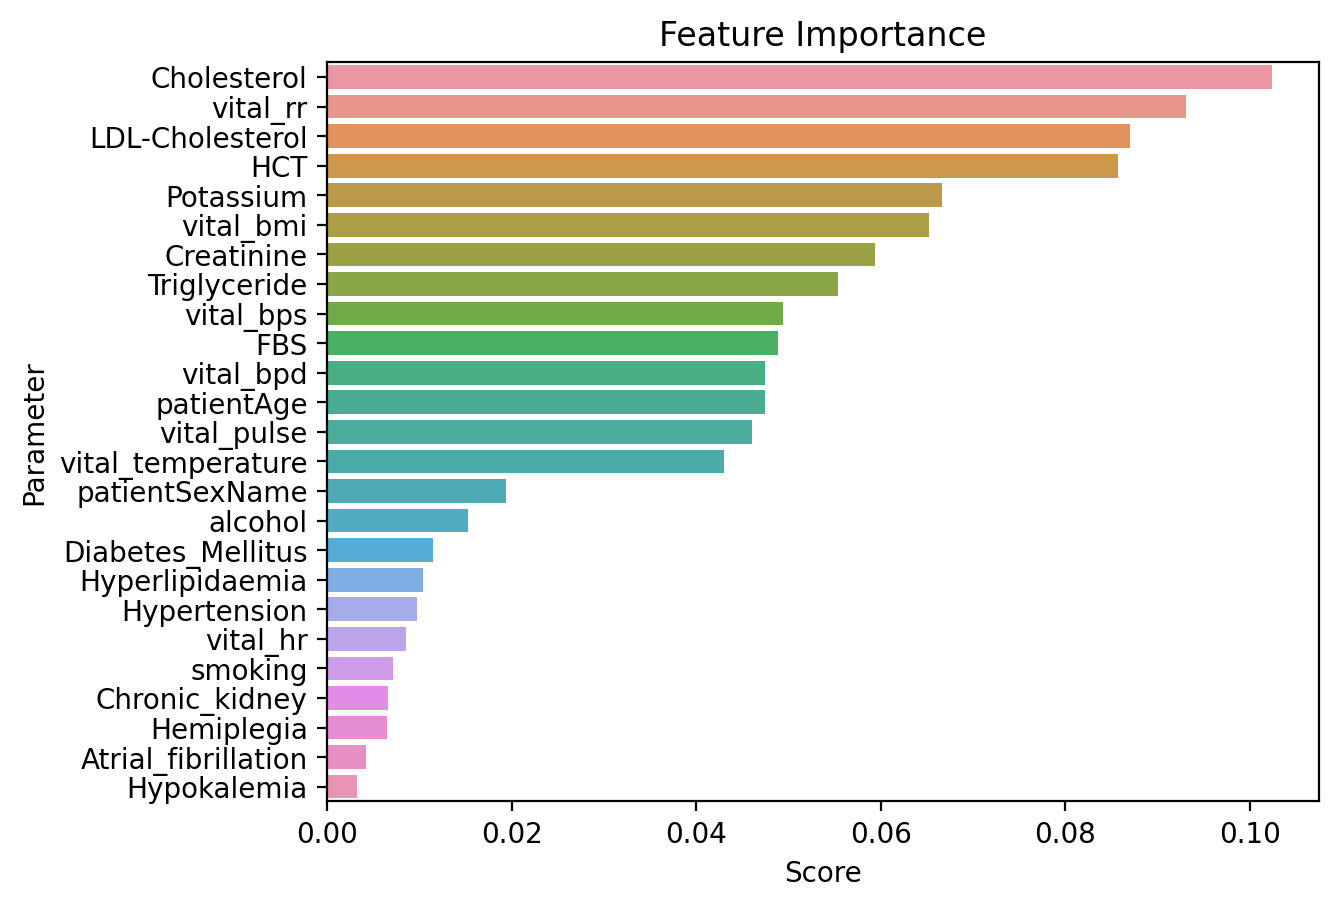

In [38]:
features = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

sns.barplot(x=features, y=features.index)
plt.xlabel('Score')
plt.ylabel('Parameter')
plt.title('Feature Importance')
plt.show()

In [39]:
fs = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
fs

Cholesterol           0.10
vital_rr              0.09
LDL-Cholesterol       0.09
HCT                   0.09
Potassium             0.07
vital_bmi             0.07
Creatinine            0.06
Triglyceride          0.06
vital_bps             0.05
FBS                   0.05
vital_bpd             0.05
patientAge            0.05
vital_pulse           0.05
vital_temperature     0.04
patientSexName        0.02
alcohol               0.02
Diabetes_Mellitus     0.01
Hyperlipidaemia       0.01
Hypertension          0.01
vital_hr              0.01
smoking               0.01
Chronic_kidney        0.01
Hemiplegia            0.01
Atrial_fibrillation   0.00
Hypokalemia           0.00
dtype: float64

In [40]:
# fs.sort_values(ascending=True).plot(kind='barh' , color='orange')

In [41]:
fs[fs > 0.05]

Cholesterol       0.10
vital_rr          0.09
LDL-Cholesterol   0.09
HCT               0.09
Potassium         0.07
vital_bmi         0.07
Creatinine        0.06
Triglyceride      0.06
dtype: float64

In [42]:
X = df[['vital_bmi','Cholesterol','Triglyceride','LDL-Cholesterol','vital_pulse','FBS',
       'Creatinine','patientAge','vital_bps','vital_bpd']]
y = df['stroke']

In [43]:
# fs > 0.05

In [44]:
# forest = RandomForestClassifier()
# forest.fit(X, y)

In [45]:
# df_scores = pd.DataFrame({'feature':X.columns,'importanceScore': forest.feature_importances_})
# df_scores.plot.barh(x='feature', y='importanceScore');

In [46]:
# features = df_scores[df_scores['importanceScore'] > 0.05]
# features

In [47]:
# cols = features.index
# cols

In [48]:
# df.columns

In [49]:
# X = df.drop(['rowID', 'stroke','Age_R','health_level','LDL_level','Chronic_kidney','Hypokalemia',
#            'vital_rr','Atrial_fibrillation','vital_hr','vital_temperature','Hemiplegia','Hypertension',
#             'Diabetes_Mellitus','Hyperlipidaemia','exercise','smoking','patientSexName','alcohol'], axis=1)
# y = df['stroke']

In [50]:
X

,vital_bmi,Cholesterol,Triglyceride,LDL-Cholesterol,vital_pulse,FBS,Creatinine,patientAge,vital_bps,vital_bpd
0,25.30,142.60,347.00,124.00,73.00,97.20,0.70,69,150.00,90.00
1,26.78,158.60,92.80,86.00,80.00,128.00,1.11,75,150.00,84.00
2,25.13,218.00,218.00,141.00,69.00,93.00,1.40,80,144.00,66.00
3,31.49,159.00,120.00,95.00,78.00,98.00,1.30,51,130.00,70.00
4,29.30,193.00,178.00,101.00,94.00,124.00,0.86,57,120.00,89.00
...,...,...,...,...,...,...,...,...,...,...
26024,27.56,261.00,128.00,170.00,72.00,99.00,0.67,68,144.00,67.00
26025,26.90,188.00,138.00,108.00,92.00,120.00,0.82,62,154.00,90.00
26026,31.33,171.00,126.00,101.00,66.00,214.00,2.11,64,187.00,69.00
26027,24.39,199.00,59.00,112.00,69.00,114.00,0.90,63,130.00,75.00


In [51]:
y

0        1
1        1
2        1
3        1
4        1
        ..
26024    0
26025    0
26026    0
26027    0
26028    0
Name: stroke, Length: 26029, dtype: int64

In [52]:
# train 80 & test 20 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

## Random Forest use feature importance

In [53]:
rf = RandomForestClassifier()

In [54]:
rf = rf.fit(X_train, y_train)

In [55]:
y_pred = rf.predict(X_test)

In [56]:
rf.score(X_train, y_train)

0.9999519761801854

In [57]:
rf.score(X_test, y_test)

0.8632347291586631

In [58]:
confusion_matrix(y_test, y_pred)

array([[4329,   49],
       [ 663,  165]], dtype=int64)

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92      4378
           1       0.77      0.20      0.32       828

    accuracy                           0.86      5206
   macro avg       0.82      0.59      0.62      5206
weighted avg       0.85      0.86      0.83      5206



In [60]:
# plot_confusion_matrix(rf, X_test, y_test);

# ##########################################

## Decision Tree UnderSample

In [61]:
df.head()

,rowID,patientAge,patientSexName,smoking,alcohol,vital_bmi,vital_hr,vital_pulse,vital_temperature,vital_rr,vital_bps,vital_bpd,LDL-Cholesterol,Hypertension,Hyperlipidaemia,Diabetes_Mellitus,Hemiplegia,Chronic_kidney,Atrial_fibrillation,Hypokalemia,stroke,Age_R,health_level,LDL_level,Creatinine,Cholesterol,FBS,Triglyceride,Potassium,HCT,Age_R_e,health_level_e,LDL_level_e
0,3719915,69,0.00,0.00,0.00,25.30,80.00,73.00,36.00,16.00,150.00,90.00,124.00,1,0,0,0,0,0,0,1,65-69,obese 1,close to normal,0.70,142.60,97.20,347.00,3.92,39.54,10,4,2
1,215399,75,1.00,1.00,0.00,26.78,80.00,80.00,36.60,20.00,150.00,84.00,86.00,1,1,1,0,0,0,0,1,75+,obese 1,normal,1.11,158.60,128.00,92.80,4.95,38.34,12,4,1
2,1556914,80,1.00,1.00,1.00,25.13,80.00,69.00,36.50,20.00,144.00,66.00,141.00,1,0,0,0,1,0,0,1,75+,obese 1,quite high,1.40,218.00,93.00,218.00,4.50,38.00,12,4,3
3,3970389,51,1.00,1.00,0.00,31.49,80.00,78.00,36.50,20.00,130.00,70.00,95.00,1,1,0,0,0,0,0,1,50-54,obese 2,normal,1.30,159.00,98.00,120.00,4.00,49.00,7,5,1
4,100835,57,0.00,1.00,0.00,29.30,80.00,94.00,36.00,16.00,120.00,89.00,101.00,1,0,0,0,0,0,0,1,55-59,obese 1,close to normal,0.86,193.00,124.00,178.00,3.99,40.38,8,4,2


In [62]:
X = df.drop(['rowID', 'stroke','Age_R','health_level','LDL_level','Age_R_e','health_level_e','LDL_level_e'], axis=1)
y = df['stroke']

In [63]:
# X = df.drop(['rowID', 'stroke','Age_R','health_level','LDL_level'], axis=1)
# y = df['stroke']

In [64]:
# X

In [65]:
rus = RandomUnderSampler(sampling_strategy=1) 
X_rus, y_rus = rus.fit_resample(X, y)

In [66]:
Counter(y_rus)

Counter({0: 4378, 1: 4378})

In [67]:
# train 90 & test 10 
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.15, random_state=131)

In [68]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()

In [69]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [70]:
dt.score(X_train,y_train)

1.0

In [71]:
dt.score(X_test,y_test)

0.7031963470319634

In [72]:
y_pred = dt.predict(X_test)

In [73]:
confusion_matrix(y_test, y_pred)

array([[483, 216],
       [174, 441]], dtype=int64)

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.69      0.71       699
           1       0.67      0.72      0.69       615

    accuracy                           0.70      1314
   macro avg       0.70      0.70      0.70      1314
weighted avg       0.71      0.70      0.70      1314



In [75]:
# plot_confusion_matrix(dt, X_test, y_test);

## Random Forest UnderSample

In [76]:
rf = RandomForestClassifier()
rf = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [77]:
y_pred_train = rf.predict(X_train)

In [78]:
rf.score(X_train, y_train)

1.0

In [79]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3679
           1       1.00      1.00      1.00      3763

    accuracy                           1.00      7442
   macro avg       1.00      1.00      1.00      7442
weighted avg       1.00      1.00      1.00      7442



In [80]:
rf.score(X_test, y_test)

0.8112633181126332

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       699
           1       0.79      0.81      0.80       615

    accuracy                           0.81      1314
   macro avg       0.81      0.81      0.81      1314
weighted avg       0.81      0.81      0.81      1314



In [82]:
# plot_confusion_matrix(rf, X_test, y_test);

## XGBoost UnderSample

In [83]:
import xgboost as xgb
xg = xgb.XGBClassifier()
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)

In [84]:
xg.score(X_train,y_train)

0.9764848159097017

In [85]:
xg.score(X_test,y_test)

0.8439878234398782

In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       699
           1       0.83      0.84      0.83       615

    accuracy                           0.84      1314
   macro avg       0.84      0.84      0.84      1314
weighted avg       0.84      0.84      0.84      1314



##  GradientBoostingClassifier UnderSample

In [87]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train, y_train)
y_pred = GBC.predict(X_test)

In [88]:
GBC.score(X_train,y_train)

0.8282719699005644

In [89]:
GBC.score(X_test,y_test)

0.8135464231354642

In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       699
           1       0.78      0.84      0.81       615

    accuracy                           0.81      1314
   macro avg       0.81      0.81      0.81      1314
weighted avg       0.82      0.81      0.81      1314



## Naive Bayes UnderSample

In [91]:
from sklearn.naive_bayes import MultinomialNB # MultinomialNB or BernoulliNB
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [92]:
nb.score(X_train,y_train)

0.6451222789572696

In [93]:
nb.score(X_test,y_test)

0.6354642313546424

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.58      0.63       699
           1       0.59      0.70      0.64       615

    accuracy                           0.64      1314
   macro avg       0.64      0.64      0.64      1314
weighted avg       0.64      0.64      0.63      1314



## Logistic R UnderSample 

In [95]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [96]:
print(y_pred)

[0 1 1 ... 0 1 1]


In [97]:
lr.score(X_train, y_train)

0.6984681537221177

In [98]:
lr.score(X_test, y_test)

0.7115677321156774

In [99]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.70      0.72       699
           1       0.68      0.72      0.70       615

    accuracy                           0.71      1314
   macro avg       0.71      0.71      0.71      1314
weighted avg       0.71      0.71      0.71      1314



## SVM UnderSample 

In [100]:
from sklearn import svm 
svm = svm.SVC()
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

In [101]:
svm.score(X_train, y_train)

0.6898683149690943

In [102]:
svm.score(X_test, y_test)

0.6917808219178082

In [103]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.63      0.69       699
           1       0.64      0.76      0.70       615

    accuracy                           0.69      1314
   macro avg       0.70      0.70      0.69      1314
weighted avg       0.70      0.69      0.69      1314



## KNN

In [104]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train,y_train)
y_pred = KNN_model.predict(X_test)

In [105]:
KNN_model.score(X_train, y_train)

0.7708949207202365

In [106]:
KNN_model.score(X_test, y_test)

0.6735159817351598

In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.67      0.68       699
           1       0.64      0.68      0.66       615

    accuracy                           0.67      1314
   macro avg       0.67      0.67      0.67      1314
weighted avg       0.68      0.67      0.67      1314



## lgbm

In [108]:
# conda install lightgbm

In [109]:
# conda install lightgbm
import lightgbm as lgb
lgb = lgb.LGBMClassifier()
lgb.fit(X_train,y_train)
y_pred = lgb.predict(X_test)

In [110]:
lgb.score(X_train, y_train)

0.930798172534265

In [111]:
lgb.score(X_test, y_test)

0.8432267884322678

In [112]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       699
           1       0.82      0.85      0.83       615

    accuracy                           0.84      1314
   macro avg       0.84      0.84      0.84      1314
weighted avg       0.84      0.84      0.84      1314



In [113]:
# lgb.get_params()

In [117]:
models= {'model': ['KNN', 'LR', 'DT', 'RF', 'GB', 'XGB', 'LGBM', 'NB', 'SVM'],
        'Recall': [0.66, 0.71, 0.71, 0.80, 0.83, 0.85, 0.85, 0.69, 0.77],
        'Precision':[0.66,0.68,0.66,0.79,0.78,0.82,0.83,0.59,0.65],
        'F1-Score': [0.66,0.70,0.69,0.80,0.80,0.83,0.84,0.64,0.70],
        'Test_Accuracy': [0.67,0.70,0.69,0.80,0.81,0.84,0.85,0.63,0.70,],
        'Train_Accuracy': [0.77,0.70,1.00,1.00,0.82,0.98,0.93,0.64,0.69]}
df_model_scores = pd.DataFrame(models)
df_model_scores

,model,Recall,Precision,F1-Score,Test_Accuracy,Train_Accuracy
0,KNN,0.66,0.66,0.66,0.67,0.77
1,LR,0.71,0.68,0.70,0.70,0.70
2,DT,0.71,0.66,0.69,0.69,1.00
3,RF,0.80,0.79,0.80,0.80,1.00
4,GB,0.83,0.78,0.80,0.81,0.82
5,XGB,0.85,0.82,0.83,0.84,0.98
6,LGBM,0.85,0.83,0.84,0.85,0.93
7,NB,0.69,0.59,0.64,0.63,0.64
8,SVM,0.77,0.65,0.70,0.70,0.69


In [ ]:
asasas

## Pipeline

In [127]:
from sklearn.pipeline import Pipeline

In [124]:
X = df.drop(['rowID', 'stroke','Age_R','health_level','LDL_level','Age_R_e','health_level_e','LDL_level_e'], axis=1)
y = df['stroke']

In [125]:
rus = RandomUnderSampler(sampling_strategy=1) 
X_rus, y_rus = rus.fit_resample(X, y)

In [126]:
# train 85 & test 15
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.15, random_state=131)

In [141]:
models = Pipeline(steps=[('estimator', KNN_model)])
param_grid = [{'estimator':[KNN_model]}, {'estimator':[lr]},{'estimator':[dt]},{'estimator':[rf]},
             {'estimator':[GBC]},{'estimator':[xg]},{'estimator':[lgb]},
             {'estimator':[nb]},{'estimator':[svm]}]
tuning_model = GridSearchCV(models, scoring='accuracy', return_train_score= True,cv=6, param_grid=param_grid)
tuning_model.fit(X_train,y_train)
pd.DataFrame(tuning_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.00,0.00,0.17,0.02,KNeighborsClassifier(),{'estimator': KNeighborsClassifier()},0.65,0.65,0.65,0.65,0.66,0.64,0.65,0.01,8,0.77,0.77,0.78,0.77,0.78,0.77,0.77,0.00
1,0.07,0.00,0.00,0.00,LogisticRegression(),{'estimator': LogisticRegression()},0.72,0.69,0.69,0.71,0.68,0.69,0.70,0.01,5,0.71,0.70,0.70,0.70,0.70,0.71,0.70,0.00
2,0.07,0.01,0.00,0.00,DecisionTreeClassifier(),{'estimator': DecisionTreeClassifier()},0.72,0.68,0.70,0.70,0.69,0.69,0.70,0.01,6,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00
3,0.96,0.03,0.03,0.00,"(DecisionTreeClassifier(max_features='auto', r...",{'estimator': (DecisionTreeClassifier(max_feat...,0.81,0.80,0.80,0.81,0.77,0.79,0.80,0.01,4,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00
4,1.21,0.01,0.00,0.00,([DecisionTreeRegressor(criterion='friedman_ms...,{'estimator': ([DecisionTreeRegressor(criterio...,0.82,0.79,0.81,0.82,0.79,0.79,0.80,0.01,3,0.82,0.83,0.83,0.83,0.83,0.84,0.83,0.01
5,0.35,0.04,0.01,0.00,"XGBClassifier(base_score=None, booster=None, c...","{'estimator': XGBClassifier(base_score=None, b...",0.85,0.83,0.83,0.84,0.81,0.81,0.83,0.01,2,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.00
6,0.19,0.01,0.01,0.00,LGBMClassifier(),{'estimator': LGBMClassifier()},0.87,0.83,0.83,0.84,0.82,0.82,0.83,0.02,1,0.94,0.94,0.94,0.94,0.94,0.94,0.94,0.00
7,0.01,0.00,0.00,0.00,MultinomialNB(),{'estimator': MultinomialNB()},0.66,0.65,0.63,0.63,0.64,0.64,0.64,0.01,9,0.64,0.64,0.65,0.64,0.64,0.64,0.64,0.00
8,1.73,0.04,0.60,0.02,SVC(),{'estimator': SVC()},0.70,0.67,0.68,0.68,0.67,0.67,0.68,0.01,7,0.68,0.69,0.68,0.69,0.68,0.69,0.68,0.00


## feature importance (under sample) 

In [ ]:
features = pd.Series(rf.feature_importances_, index=X_rus.columns).sort_values(ascending=False)

sns.barplot(x=features, y=features.index)
plt.xlabel('Score')
plt.ylabel('Parameter')
plt.title('Feature Importance')
plt.show()

In [ ]:
fs = pd.Series(rf.feature_importances_, index=X_rus.columns).sort_values(ascending=False)
fs[fs > 0.045]

In [ ]:
fs = pd.Series(rf.feature_importances_, index=X_rus.columns).sort_values(ascending=False)
fs[fs > 0.00]

In [ ]:
asasas

## Decision Tree UnderSample (fea im)

In [ ]:
X = df[['Cholesterol','HCT','LDL-Cholesterol','Potassium','Creatinine',
       'vital_bmi']]
y = df['stroke']

In [ ]:
# X = df[['Cholesterol','HCT','LDL-Cholesterol','Potassium','Creatinine',
#        'vital_bmi','Triglyceride','vital_rr','patientAge','FBS','vital_bps','vital_bpd','vital_pulse',
#        'vital_temperature','patientSexName','alcohol','Hypertension']]
# y = df['stroke']

In [ ]:
# X = df[['Cholesterol','HCT','LDL-Cholesterol','Potassium','Creatinine',
#        'vital_bmi','Triglyceride','vital_rr','patientAge','FBS','vital_bps','vital_bpd','vital_pulse']]
# y = df['stroke']

In [ ]:
# X = df[['Cholesterol','Creatinine','LDL_level_e','Triglyceride','health_level_e','FBS','vital_bpd',
#        'vital_bps','vital_pulse','Age_R_e','Potassium','HCT','patientSexName','smoking','Diabetes_Mellitus']]
# y = df['stroke']

In [ ]:
rus = RandomUnderSampler(sampling_strategy=1) 
X_rus, y_rus = rus.fit_resample(X, y)

In [ ]:
Counter(y_rus)

In [ ]:
# train 90 & test 10 
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.15, random_state=123)

In [ ]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)

In [ ]:
dt.score(X_train,y_train)

In [ ]:
dt.score(X_test,y_test)

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

## Random Forest UnderSample (fea im)

In [ ]:
rf = RandomForestClassifier()
rf = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [ ]:
# X_train

In [ ]:
rf.score(X_train, y_train)

In [ ]:
rf.score(X_test, y_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
# y_train

In [ ]:
# y_pred_train = rf.predict(X_train)

In [ ]:
# print(classification_report(y_train, y_pred_train))

## Gradien UnderSample (fea im)

In [ ]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train, y_train)
y_pred = GBC.predict(X_test)

In [ ]:
GBC.score(X_train, y_train)

In [ ]:
GBC.score(X_test, y_test)

In [ ]:
print(classification_report(y_test, y_pred))

## XGBoost UnderSample (fea im)

In [ ]:
import xgboost as xgb
xg = xgb.XGBClassifier()
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)

In [ ]:
xg.score(X_train, y_train)

In [ ]:
xg.score(X_test, y_test)

In [ ]:
print(classification_report(y_test, y_pred))

## Lightgbm 

In [ ]:
# conda install lightgbm
import lightgbm as lgb
lgb = lgb.LGBMClassifier()
lgb.fit(X_train,y_train)
y_pred = lgb.predict(X_test)

In [ ]:
lgb.score(X_train, y_train)

In [ ]:
lgb.score(X_test, y_test)

In [ ]:
print(classification_report(y_test, y_pred))

## Naive Bayes UnderSample (fea im)

In [ ]:
from sklearn.naive_bayes import MultinomialNB # MultinomialNB or BernoulliNB
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [ ]:
nb.score(X_train, y_train)

In [ ]:
nb.score(X_test, y_test)

In [ ]:
print(classification_report(y_test, y_pred))

## LR UnderSample (fea im)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [ ]:
lr.score(X_train, y_train)

In [ ]:
lr.score(X_test, y_test)

In [ ]:
print(classification_report(y_test, y_pred))

## SVM UnderSample (fea im)

In [ ]:
from sklearn import svm 
svm = svm.SVC()
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

In [ ]:
svm.score(X_train, y_train)

In [ ]:
svm.score(X_test, y_test)

In [ ]:
print(classification_report(y_test, y_pred))

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train,y_train)
y_pred = KNN_model.predict(X_test)

In [ ]:
KNN_model.score(X_train, y_train)

In [ ]:
KNN_model.score(X_test, y_test)

In [ ]:
print(classification_report(y_test, y_pred))

## SMOTE 

In [ ]:
# sm = SMOTE(random_state = 10)
# X_sm, y_sm = sm.fit_resample(X, y)

In [ ]:
# Counter(y_sm)

In [ ]:
# # train 80 & test 20 
# X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=7)

In [ ]:
# from sklearn import tree
# dt = tree.DecisionTreeClassifier()

In [ ]:
# dt.fit(X_train,y_train)

In [ ]:
# dt.score(X_train,y_train)

In [ ]:
# dt.score(X_test,y_test)

In [ ]:
# y_pred = dt.predict(X_test)

In [ ]:
# print(classification_report(y_test, y_pred))

## Scale  (mean=0, std=1)

In [ ]:
df.head()

In [ ]:
from sklearn import preprocessing

In [ ]:
# scaler = preprocessing.StandardScaler()
# cols = df[['Age_R_e','patientSexName','smoking','exercise','alcohol','health_level_e',
#            'vital_hr','vital_pulse','vital_temperature','vital_rr','vital_bps',
#           'vital_bpd','Cholesterol','Creatinine','FBS','LDL_level_e','Triglyceride',
#           'Potassium','HCT','Hypertension','Hyperlipidaemia','Diabetes_Mellitus','Hemiplegia',
#           'Chronic_kidney','Atrial_fibrillation','Hypokalemia']]
# scaler.fit(cols)
# z = scaler.transform(cols)
# z[:2]

In [ ]:
# scaler = preprocessing.StandardScaler()
# cols = df[['patientAge','patientSexName','smoking','alcohol','vital_bmi',
#            'vital_hr','vital_pulse','vital_temperature','vital_rr','vital_bps',
#           'vital_bpd','Cholesterol','Creatinine','FBS','LDL-Cholesterol','Triglyceride',
#           'Potassium','HCT','Hypertension','Hyperlipidaemia','Diabetes_Mellitus','Hemiplegia',
#           'Chronic_kidney','Atrial_fibrillation','Hypokalemia','Age_R_e','health_level_e','LDL_level_e']]
# scaler.fit(cols)
# z = scaler.transform(cols)
# z[:2]

In [ ]:
scaler = preprocessing.StandardScaler()
cols = df[['patientAge','patientSexName','vital_bmi',
           'vital_hr','vital_pulse','vital_temperature','vital_rr','vital_bps',
          'vital_bpd','Cholesterol','Creatinine','FBS','LDL-Cholesterol','Triglyceride',
          'Potassium','HCT','Hypertension','Hyperlipidaemia','Diabetes_Mellitus','Hemiplegia',
          'Chronic_kidney','Atrial_fibrillation','Hypokalemia','Age_R_e','health_level_e','LDL_level_e']]
scaler.fit(cols)
z = scaler.transform(cols)
z[:2]

In [ ]:
# df_s = pd.concat([df, pd.DataFrame(z, columns=['z_Age_R_e','z_patientSexName','z_smoking','z_exercise',
#                                              'z_alcohol','z_health_level_e','z_vital_hr','z_vital_pulse',
#                                              'z_vital_temperature','z_vital_rr','z_vital_bps','z_vital_bpd',
#                                              'z_Cholesterol','z_Creatinine','z_FBS','z_LDL_level_e',
#                                              'z_Triglyceride','z_Potassium','z_HCT','z_Hypertension','z_Hyperlipidaemia',
#                                               'z_Diabetes_Mellitus', 'z_Hemiplegia','z_Chronic_kidney','z_Atrial_fibrillation',
#                                               'z_Hypokalemia'])], axis=1)
# df_s.head

In [ ]:
df_s = pd.concat([df, pd.DataFrame(z, columns=['z_patientAge','z_patientSexName','z_vital_bmi','z_vital_hr','z_vital_pulse',
                                             'z_vital_temperature','z_vital_rr','z_vital_bps','z_vital_bpd',
                                             'z_Cholesterol','z_Creatinine','z_FBS','z_LDL-Cholesterol',
                                             'z_Triglyceride','z_Potassium','z_HCT','z_Hypertension','z_Hyperlipidaemia',
                                              'z_Diabetes_Mellitus', 'z_Hemiplegia','z_Chronic_kidney','z_Atrial_fibrillation',
                                              'z_Hypokalemia','z_Age_R_e','z_health_level_e','z_LDL_level_e'])], axis=1)
df_s.head

In [ ]:
# df_s = pd.concat([df, pd.DataFrame(z, columns=['z_patientAge','z_patientSexName','z_smoking',
#                                              'z_alcohol','z_vital_bmi','z_vital_hr','z_vital_pulse',
#                                              'z_vital_temperature','z_vital_rr','z_vital_bps','z_vital_bpd',
#                                              'z_Cholesterol','z_Creatinine','z_FBS','z_LDL-Cholesterol',
#                                              'z_Triglyceride','z_Potassium','z_HCT','z_Hypertension','z_Hyperlipidaemia',
#                                               'z_Diabetes_Mellitus', 'z_Hemiplegia','z_Chronic_kidney','z_Atrial_fibrillation',
#                                               'z_Hypokalemia','z_Age_R_e','z_health_level_e','z_LDL_level_e'])], axis=1)
# df_s.head

In [ ]:
df_s

In [ ]:
# df_s = df_s.drop(['Age_R_e','patientSexName','smoking','alcohol','health_level_e',
#            'vital_hr','vital_pulse','vital_temperature','vital_rr','vital_bps',
#           'vital_bpd','Cholesterol','Creatinine','FBS','LDL_level_e','Triglyceride',
#           'Potassium','HCT','Hypertension','Hyperlipidaemia','Diabetes_Mellitus','Hemiplegia',
#           'Chronic_kidney','Atrial_fibrillation','Hypokalemia','patientAge','vital_bmi','LDL-Cholesterol'],axis = 1)
# df_s

In [ ]:
df_s = df_s.drop(['Age_R_e','patientSexName','health_level_e',
           'vital_hr','vital_pulse','vital_temperature','vital_rr','vital_bps',
          'vital_bpd','Cholesterol','Creatinine','FBS','LDL_level_e','Triglyceride',
          'Potassium','HCT','Hypertension','Hyperlipidaemia','Diabetes_Mellitus','Hemiplegia',
          'Chronic_kidney','Atrial_fibrillation','Hypokalemia','patientAge','vital_bmi','LDL-Cholesterol'],axis = 1)
df_s

In [ ]:
# X = df_s.drop(['rowID', 'stroke','Age_R','health_level','LDL_level','patientAge','vital_bmi','LDL-Cholesterol'], axis=1)
# y = df_s['stroke']

In [ ]:
X = df_s.drop(['rowID', 'stroke','Age_R','health_level','LDL_level','z_Age_R_e','z_health_level_e','z_LDL_level_e'], axis=1)
y = df_s['stroke']

In [ ]:
X

In [ ]:
rus = RandomUnderSampler(sampling_strategy=1) 
X_rus, y_rus = rus.fit_resample(X, y)

In [ ]:
Counter(y_rus)

In [ ]:
# train 90 & test 10
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.15,shuffle=True ,random_state=123)

In [ ]:
asasas

## Decision Tree 

In [ ]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [ ]:
dt.score(X_train, y_train)

In [ ]:
dt.score(X_test, y_test)

In [ ]:
print(classification_report(y_test, y_pred))

## Random Forest 

In [ ]:
rf = RandomForestClassifier()
rf = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [ ]:
rf.score(X_train, y_train)

In [ ]:
rf.score(X_test, y_test)

In [ ]:
print(classification_report(y_test, y_pred))

## KNN 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train,y_train)
y_pred = KNN_model.predict(X_test)

In [ ]:
KNN_model.score(X_train,y_train)

In [ ]:
KNN_model.score(X_test,y_test)

In [ ]:
print(classification_report(y_test, y_pred))

## Rogistic 

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [ ]:
lr.score(X_train,y_train)

In [ ]:
lr.score(X_test,y_test)

In [ ]:
print(classification_report(y_test, y_pred))

## SVM 

In [ ]:
from sklearn import svm 
svm = svm.SVC()
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

In [ ]:
svm.score(X_train,y_train)

In [ ]:
svm.score(X_test,y_test)

In [ ]:
print(classification_report(y_test, y_pred))

## Gradien

In [ ]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train, y_train)
y_pred = GBC.predict(X_test)

In [ ]:
GBC.score(X_train,y_train)

In [ ]:
GBC.score(X_test,y_test)

In [ ]:
print(classification_report(y_test, y_pred))

## XGBoost 

In [ ]:
import xgboost as xgb
xg = xgb.XGBClassifier()
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)

In [ ]:
xg.score(X_train,y_train)

In [ ]:
xg.score(X_test,y_test)

In [ ]:
print(classification_report(y_test, y_pred))

## Lightgbm 

In [ ]:
# conda install lightgbm
import lightgbm as lgb
lgb = lgb.LGBMClassifier()
lgb.fit(X_train,y_train)
y_pred = lgb.predict(X_test)

In [ ]:
lgb.score(X_train,y_train)

In [ ]:
lgb.score(X_test,y_test)

In [ ]:
print(classification_report(y_test, y_pred))

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [ ]:
nb.score(X_train,y_train)

In [ ]:
nb.score(X_test,y_test)

In [ ]:
print(classification_report(y_test, y_pred))

## Feature Importance

In [ ]:
features = pd.Series(rf.feature_importances_, index=X_rus.columns).sort_values(ascending=False)

sns.barplot(x=features, y=features.index)
plt.xlabel('Score')
plt.ylabel('Parameter')
plt.title('Feature Importance')
plt.show()

In [ ]:
fs = pd.Series(rf.feature_importances_, index=X_rus.columns).sort_values(ascending=False)
fs[fs >= 0.045]

In [ ]:
X = df_s[['z_Cholesterol','z_Creatinine','z_FBS','z_vital_bmi','z_Triglyceride','z_LDL-Cholesterol',
        'z_Potassium','z_HCT','z_patientAge','z_vital_rr','z_vital_bps','z_vital_bpd']]
y = df_s['stroke']

In [ ]:
rus = RandomUnderSampler(sampling_strategy=1) 
X_rus, y_rus = rus.fit_resample(X, y)

In [ ]:
Counter(y_rus)

In [ ]:
# train 90 & test 10 
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.15, random_state=123)

## DT

In [ ]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [ ]:
dt.score(X_train,y_train)

In [ ]:
dt.score(X_test,y_test)

In [ ]:
print(classification_report(y_test, y_pred))

## RF 

In [ ]:
rf = RandomForestClassifier()
rf = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [ ]:
rf.score(X_train,y_train)

In [ ]:
rf.score(X_test,y_test)

In [ ]:
print(classification_report(y_test, y_pred))

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train,y_train)
y_pred = KNN_model.predict(X_test)

In [ ]:
KNN_model.score(X_train,y_train)

In [ ]:
KNN_model.score(X_test,y_test)

In [ ]:
print(classification_report(y_test, y_pred))

## LR

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [ ]:
lr.score(X_train,y_train)

In [ ]:
lr.score(X_test,y_test)

In [ ]:
print(classification_report(y_test, y_pred))

## SVM

In [ ]:
from sklearn import svm 
svm = svm.SVC()
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

In [ ]:
svm.score(X_train,y_train)

In [ ]:
svm.score(X_test,y_test)

In [ ]:
print(classification_report(y_test, y_pred))

## GBC 

In [ ]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train, y_train)
y_pred = GBC.predict(X_test)

In [ ]:
GBC.score(X_train,y_train)

In [ ]:
GBC.score(X_test,y_test)

In [ ]:
print(classification_report(y_test, y_pred))

## XGBoost

In [ ]:
import xgboost as xgb
xg = xgb.XGBClassifier()
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)

In [ ]:
xg.score(X_train,y_train)

In [ ]:
xg.score(X_test,y_test)

In [ ]:
print(classification_report(y_test, y_pred))

## LGBM

In [ ]:
# conda install lightgbm
import lightgbm as lgb
lgb = lgb.LGBMClassifier()
lgb.fit(X_train,y_train)
y_pred = lgb.predict(X_test)

In [ ]:
lgb.score(X_train,y_train)

In [ ]:
lgb.score(X_test,y_test)

In [ ]:
print(classification_report(y_test, y_pred))

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [ ]:
nb.score(X_train,y_train)

In [ ]:
nb.score(X_test,y_test)

In [ ]:
print(classification_report(y_test, y_pred))

## Lazy Predict

Lazy Predict
มันเป็นหนึ่งในไลบรารีไพทอนที่ช่วยทำงานในการเรียนรู้ของเครื่องกึ่งอัตโนมัติ มันสร้างโมเดลพื้นฐานจำนวนมากโดยไม่ต้องใช้โค้ดมาก และช่วยให้เข้าใจว่าโมเดลใดทำงานได้ดีขึ้นโดยไม่ต้องปรับพารามิเตอร์ใดๆ

สมมติว่าเรามีคำสั่งเกี่ยวกับปัญหาและเราจำเป็นต้องใช้แบบจำลองทั้งหมดในชุดข้อมูลนั้นจริง ๆ และเราต้องวิเคราะห์ว่าแบบจำลองพื้นฐานของเราทำงานเป็นอย่างไร โมเดลพื้นฐานในที่นี้หมายถึง "โมเดลที่ไม่มีพารามิเตอร์" ดังนั้นเราจึงสามารถทำงานนี้ได้โดยตรงโดยใช้ Lazy Predict หลังจากได้ความแม่นยำทั้งหมดแล้ว เราสามารถเลือกโมเดล 5 อันดับแรก จากนั้นใช้การปรับไฮเปอร์พารามิเตอร์กับโมเดลเหล่านั้นได้

In [ ]:
df

In [ ]:
from lazypredict.Supervised import LazyClassifier

In [ ]:
X = df.drop(['rowID', 'stroke','Age_R','health_level','LDL_level','Age_R_e','health_level_e','LDL_level_e'], axis=1)
y = df['stroke']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.15,random_state =123)

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

In [ ]:
print(models)

In [ ]:
rus = RandomUnderSampler(sampling_strategy=1) 
X_rus, y_rus = rus.fit_resample(X, y)

In [ ]:
Counter(y_rus)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus,test_size=0.15,random_state =123)

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

In [ ]:
print(models)

In [ ]:
# !pip install auto-sklearn